In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'data/Large language models (2024).csv'
df = pd.read_csv(file_path, encoding='latin1')

df.columns = [col.strip().replace(' ', '_').lower() for col in df.columns]

df['parameters'] = pd.to_numeric(df['parameters'], errors='coerce')
df['tokens'] = pd.to_numeric(df['tokens'], errors='coerce')
df['alscore'] = (df['parameters'] * df['tokens']) ** 0.5

df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

df.head()


C:\Users\Debjit Mandal\AppData\Local\Temp\ipykernel_4300\2431434827.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')


,model,comapany,arch,parameters,tokens,ratio,alscore,training_dataset,release_date,notes,playground
0,Olympus,Amazon,TBA,2000.0,40000.0,20:01,8944.27191,TBA,NaT,New related Titan details: '$65m training run....,https://lifearchitect.ai/olympus/
1,GPT-5,OpenAI,TBA,2000.0,NaN,TBA,NaN,TBA,NaT,Due 2024.,https://lifearchitect.ai/gpt-5/
2,GPT-6,OpenAI,TBA,NaN,NaN,TBA,NaN,TBA,NaT,Due 2025.,https://lifearchitect.ai/gpt-6/
3,AuroraGPT (ScienceGPT),ANL,TBA,1000.0,NaN,TBA,NaN,TBA,NaT,https://tpc.dev/2023/11/10/tpc-announced-with-...,https://www.hpcwire.com/2023/11/13/training-of...
4,Grok-2,xAI,TBA,NaN,NaN,TBA,NaN,TBA,NaT,Due 2025.,https://twitter.com/elonmusk/status/1773655245...



# Detailed EDA

## 1. Explore Trends Over Time (Release Date)


In [5]:

# Removing missing values in release_date for plotting
df_release = df.dropna(subset=['release_date'])

if df_release.empty:
    print("No valid release dates available for plotting.")
else:
    # Plotting trends over time
    plt.figure(figsize=(14, 6))
    sns.lineplot(data=df_release, x='release_date', y='parameters', marker='o', label='Parameters (Billions)')
    sns.lineplot(data=df_release, x='release_date', y='tokens', marker='o', label='Tokens (Billions)')
    plt.title('Trends Over Time (Release Date)')
    plt.xlabel('Release Date')
    plt.ylabel('Count (Billions)')
    plt.legend()
    plt.show()


No valid release dates available for plotting.



## 2. Analyze the Impact of Training Datasets on Model Performance


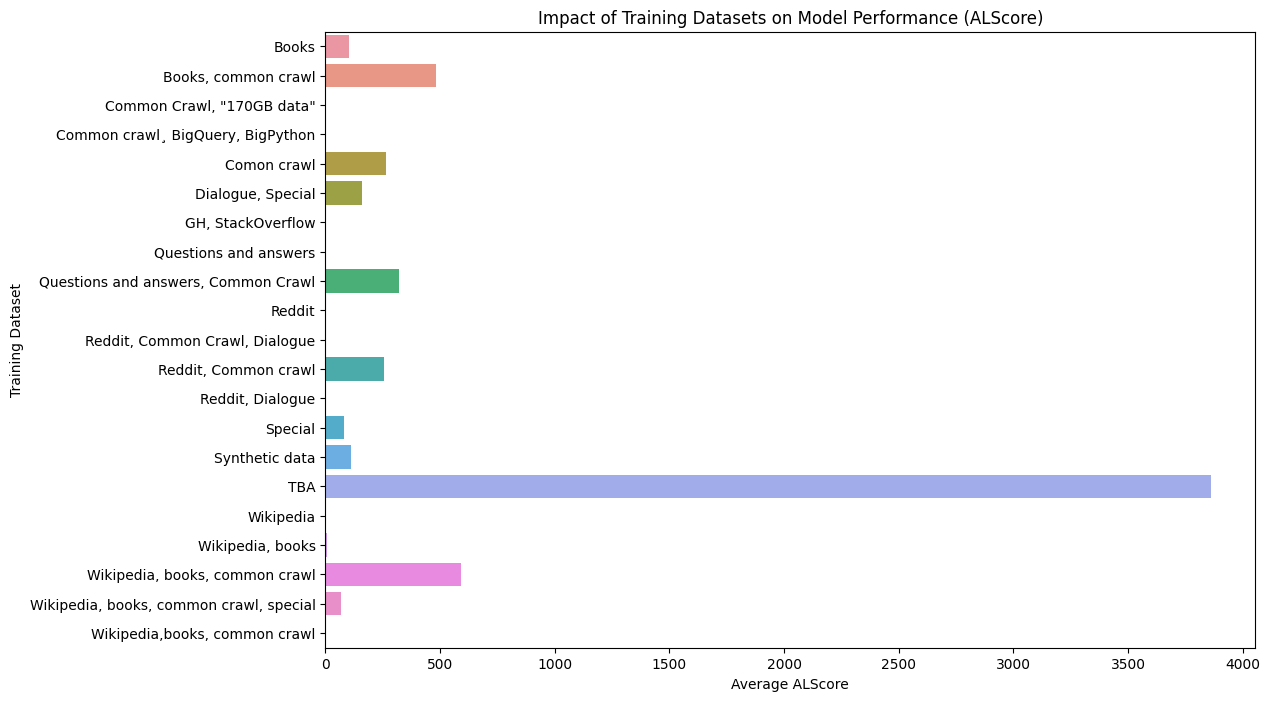

In [6]:

# Analyzing the impact of training datasets
# Grouping by training dataset and calculate mean ALScore
dataset_impact = df.groupby('training_dataset')['alscore'].mean().reset_index()

# Plotting the impact of training datasets
plt.figure(figsize=(12, 8))
sns.barplot(x='alscore', y='training_dataset', data=dataset_impact)
plt.title('Impact of Training Datasets on Model Performance (ALScore)')
plt.xlabel('Average ALScore')
plt.ylabel('Training Dataset')
plt.show()
